In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

In [8]:
df = pd.read_csv("Google_Stock_Price_Train.csv")  # Use your own file name
data = df['Open'].values.reshape(-1, 1)           # Use 'Open' price column

# Normalize the data
s= MinMaxScaler(feature_range=(0, 1))
data = s.fit_transform(data)

In [3]:
X_train = []
y_train = []

for i in range(60, len(data)):
    X_train.append(data[i-60:i, 0])   # last 60 values
    y_train.appenddata[i, 0])        # next value to predict

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)  # [samples, time_steps, features] 

In [4]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', return_sequences=False, input_shape=(60, 1)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0938
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 9.4612e-04
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.4697e-04
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6.5631e-04
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 5.5036e-04
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1193e-04
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.6363e-04
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.1640e-04
Epoch 9/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.2761e-04
Epoch 10/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4.6946e-04
Epoch 11/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 4.2552e-04
Epoch 12/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.1507e-04
Epoch 13/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.8852e-04
Epoch 14/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 5.0371e-04
Epoch 15/20
38/38 ━━━━━━━━━━━━━━

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


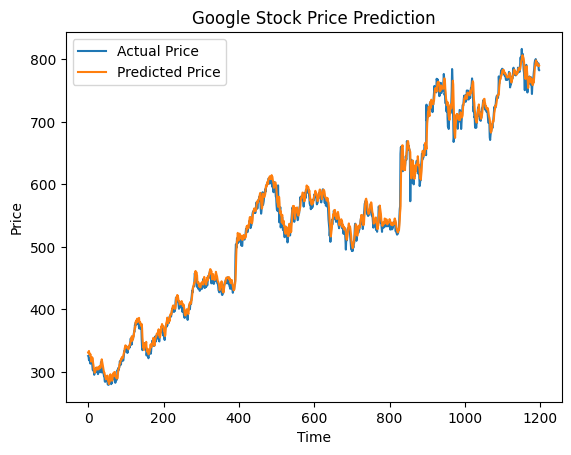

In [6]:
predicted_prices = model.predict(X_train)
predicted_prices = scaler.inverse_transform(predicted_prices)
real_prices = scaler.inverse_transform(y_train.reshape(-1, 1))

plt.plot(real_prices, label='Actual Price')
plt.plot(predicted_prices, label='Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()